In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
PriceAvailDB = pd.read_csv('./Data/Price And Availability Data.csv')# Read Data

In [3]:
print(PriceAvailDB.head())# Print first 5 rows of the data

   year quarter     market internal_class        RBA  available_space  \
0  2018      Q1    Atlanta              A  101140416         20239067   
1  2018      Q1    Atlanta              O   65810449         12728989   
2  2018      Q1     Austin              A   36815073          4281986   
3  2018      Q1     Austin              O   27947525          3360936   
4  2018      Q1  Baltimore              A   41033288          6813380   

   availability_proportion  internal_class_rent  overall_rent  \
0                 0.200109            27.655891     24.345689   
1                 0.193419            18.560886     24.345689   
2                 0.116311            40.384706     36.596618   
3                 0.121082            30.118658     36.596618   
4                 0.166045            27.104835     22.954034   

   direct_available_space  direct_availability_proportion  \
0                     NaN                             NaN   
1                     NaN                       

In [4]:
missing_values = PriceAvailDB.isnull().sum()
print(missing_values)

year                                0
quarter                             0
market                              0
internal_class                      0
RBA                                 0
available_space                     0
availability_proportion             0
internal_class_rent                 0
overall_rent                        0
direct_available_space            300
direct_availability_proportion    300
direct_internal_class_rent        300
direct_overall_rent               300
sublet_available_space            300
sublet_availability_proportion    300
sublet_internal_class_rent        300
sublet_overall_rent               300
leasing                             0
dtype: int64


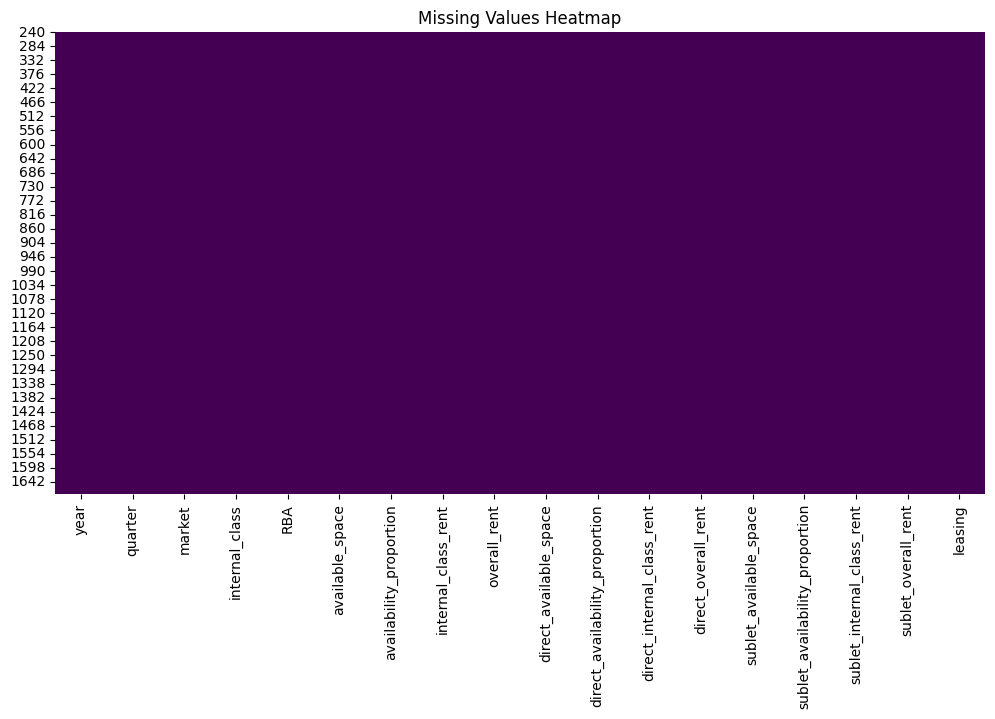

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(PriceAvailDB.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
numeric_columns = [
    'direct_available_space',
    'direct_availability_proportion',
    'direct_internal_class_rent',
    'direct_overall_rent',
    'sublet_available_space',
    'sublet_availability_proportion',
    'sublet_internal_class_rent',
    'sublet_overall_rent'
]

for col in numeric_columns:
    PriceAvailDB[col] = pd.to_numeric(PriceAvailDB[col], errors='coerce')

In [7]:
# Drop rows with missing values in numeric columns
PriceAvailDB.dropna(subset=numeric_columns, inplace=True)